<a href="https://colab.research.google.com/github/DhanvinS/Deep-Learning/blob/main/Neural%20Networks/%20Perceptron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Run this for reproducibility
np.random.seed(30)

## Q1 (9 points). Generate a synthetic dataset and convert it into a pandas DataFrame

Create a dataframe that has 1000 rows, and columns x1, x2, and label. The label should be -1 or 1, with a roughly 50/50 split among classes. The data should be linearly separable.

Feel free to visualize the data as you go about making it to make sure it's linearly separable, but delete visualization cells after (you'll visualize your final data in Q3).

In [29]:
# Answer Q1 here
# Feel free to create extra cells before the next one, if helpful

# 500 points for each class
n_per_class = 500

# Class -1 centered at (0, 0)
x1_neg = np.random.normal(loc=0.0, scale=1.0, size=n_per_class)
x2_neg = np.random.normal(loc=0.0, scale=1.0, size=n_per_class)
labels_neg = -1 * np.ones(n_per_class)

# Class 1 centered at (4, 4) (far enough to be linearly separable)
x1_pos = np.random.normal(loc=4.0, scale=1.0, size=n_per_class)
x2_pos = np.random.normal(loc=4.0, scale=1.0, size=n_per_class)
labels_pos = 1 * np.ones(n_per_class)

# Stack into a single DataFrame
x1 = np.concatenate([x1_neg, x1_pos])
x2 = np.concatenate([x2_neg, x2_pos])
labels = np.concatenate([labels_neg, labels_pos])

df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "label": labels
})

df.shape, df["label"].value_counts()


((1000, 3),
 label
 -1.0    500
  1.0    500
 Name: count, dtype: int64)

In [30]:
# After creating the dataframe,
# run this cell to show the first 10 rows of your data
df.head(10)

,x1,x2,label
0,-1.264053,0.252985,-1.0
1,1.527905,0.107527,-1.0
2,-0.970711,-1.331486,-1.0
3,0.470560,-0.622687,-1.0
4,-0.100697,-0.006435,-1.0
5,0.303793,2.614543,-1.0
6,-1.725962,0.157590,-1.0
7,1.585095,0.733478,-1.0
8,0.134297,0.355168,-1.0
9,-1.106855,0.216622,-1.0


In [31]:
# Run this cell
df.shape

(1000, 3)

## Q2 (1 point). Print the number of rows with label -1 and the number of rows with label 1
This is to make sure each class is at most 55% of the dataset.


In [32]:
# Answer Q2 here
num_neg1 = (df["label"] == -1).sum()
num_pos1 = (df["label"] == 1).sum()

print("Number of -1 labels:", num_neg1)
print("Number of 1 labels:", num_pos1)

Number of -1 labels: 500
Number of 1 labels: 500


## Q3 (10 points). Visualize the dataset

Create a scatterplot with x1 on the horizontal axis, x2 on the vertical axis, and the label represented by color. Mark the axes with x1 and x2, make the +1 points green and the -1 points red. Create a legend that indicates the color-label relationship. Give your plot a decriptive title.

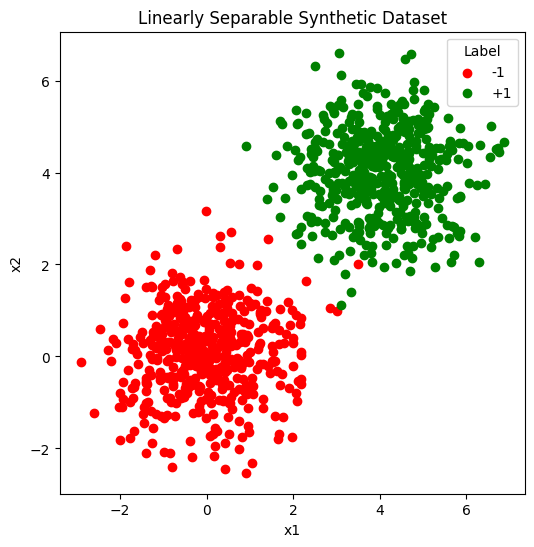

In [33]:
# Answer Q3 here

plt.figure(figsize=(6, 6))

# -1 points in red
neg = df[df["label"] == -1]
plt.scatter(neg["x1"], neg["x2"], color="red", label="-1")

# +1 points in green
pos = df[df["label"] == 1]
plt.scatter(pos["x1"], pos["x2"], color="green", label="+1")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linearly Separable Synthetic Dataset")
plt.legend(title="Label")
plt.show()

## Q4 (2 points). Train/Test split

Split df into train and test sets using sklearn.

In [34]:
# Answer Q4 here

X = df[["x1", "x2"]]   # features
y = df["label"]        # labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% test, 80% train
    random_state=42,
    shuffle=True
)

# Perceptron implementation

##Q5 (2 points). Implement a function that takes a vector x, a vector of weights w, a bias b, and returns 1 if x would be classified as 1 by the Perceptron given the weights and bias, and -1 otherwise.
You can assume that x and w have 2 elements each if that helps.

In [35]:
# Answer Q5 here
def predict_datapoint(x, w, b):
    total = np.dot(w, x) + b
    if total >= 0:
        return 1
    else:
        return -1

##Q6 (2 points). Implement a function that takes a list of vectors X (each element is a vector), a vector of weights w, a bias b, and returns a list of predictions, one for each element in X.
Use `predict_datapoint`.

In [36]:
# Answer Q6 here
def predict_data(X, w, b):
    preds = []
    for x in X:
        pred = predict_datapoint(x, w, b)
        preds.append(pred)
    return preds

##Q7 (2 points). Implement a function that takes a vector x, its ground truth y, a vector of weights w, a bias b, a learning rate, and returns new weights and bias.
This function would be called inside the main Perceptron function (in case the current prediction for x is not equal to the ground truth) to adjust the weights and bias.

In [37]:
# Answer Q7 here
# You can assume x and w are np.arrays
def update_weights(x, y, w, b, learning_rate):
    w_new = w + learning_rate * y * x
    b_new = b + learning_rate * y
    return w_new, b_new

##Q8 (1 point). Initialize the learning rate to 0.1, the bias to 0, the weights to a list of two 0s, and the errors per epoch to an empty list. Make sure all the numbers are float numbers.

In [38]:
# Answer Q8 here
learning_rate = 0.1

bias = 0.0
weights = [0.0, 0.0]

errors_per_epoch = []

##Q9 (16 points). Write the Perceptron function

You should have an outer loop that iterates over epochs. Put something like 1000 epochs to go through (unless the algorithm converges earlier -- see the last sentence).

Keep track of the number of errors in the epoch.

Inside the loop, iterate over the training examples.

For each training point, make prediction on it using `predict_datapoint`, compare that to the ground truth, and adjust the weights if needed using `update_weights`.

After the epoch concludes, put the number of errors in `errors_per_epoch` which will be a list of errors per epoch.

At the end of each epoch, print its number (the first epoch should have number 1), the weights and bias, and the number of errors. Make sure to use text in addition to values to make it clear what number means what.

If the number of errors in the epoch is 0 at the end of an epoch, print "Success!," the final weights and bias, and stop the algorithm.

In [39]:
# Answer Q9 here
def perceptron(X_data, y_data, l_rate, w, b, e_per_ep): #Use the argumements as they are named here, e.g. X_data for your X data
    w = np.array(w, dtype=float)
    b = float(b)

    max_epochs = 1000
    for epoch in range(max_epochs):
        errors = 0

        for x, y in zip(X_data.values, y_data.values):
            y_pred = predict_datapoint(x, w, b)
            if y_pred != y:
                w, b = update_weights(x, y, w, b, l_rate)
                errors += 1

        e_per_ep.append(errors)
        print(f"Epoch {epoch+1}: weights = {w}, bias = {b}, errors = {errors}")

        if errors == 0:
            print(f"Success! Final weights = {w}, final bias = {b}")
            break

    return w, b

In [40]:
final_weights, final_bias = perceptron(X_train, y_train, learning_rate, weights, bias, errors_per_epoch)
weights = final_weights
bias = final_bias

Epoch 1: weights = [0.46416155 0.38019605], bias = -0.7999999999999999, errors = 18
Epoch 2: weights = [0.40831376 0.58793143], bias = -1.2, errors = 12
Epoch 3: weights = [0.18975527 0.30382554], bias = -1.7000000000000004, errors = 11
Epoch 4: weights = [0.49007568 0.50173866], bias = -1.7000000000000004, errors = 8
Epoch 5: weights = [0.45109614 0.55183082], bias = -1.8000000000000005, errors = 9
Epoch 6: weights = [0.46568901 0.51417255], bias = -1.9000000000000006, errors = 5
Epoch 7: weights = [0.51996285 0.57051505], bias = -2.0000000000000004, errors = 7
Epoch 8: weights = [0.36360023 0.55253329], bias = -2.1000000000000005, errors = 7
Epoch 9: weights = [0.41599695 0.56673721], bias = -2.2000000000000006, errors = 3
Epoch 10: weights = [0.46839367 0.58094113], bias = -2.3000000000000007, errors = 3
Epoch 11: weights = [0.52079039 0.59514505], bias = -2.400000000000001, errors = 3
Epoch 12: weights = [0.53414679 0.61034991], bias = -2.400000000000001, errors = 4
Epoch 13: weigh

## Q10 (2 points). Plot training diagnostics

Plot the number of errors per epoch to see convergence behavior. Give your plot a title and label the axes appropriately.

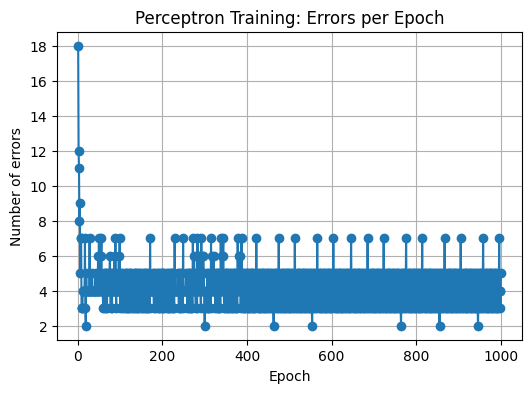

In [41]:
# Answer Q10 here

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(errors_per_epoch) + 1), errors_per_epoch, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Number of errors")
plt.title("Perceptron Training: Errors per Epoch")
plt.grid(True)
plt.show()

## Q11 (5 points). Calculate the training accuracy for your final weights and bias.
Use `predict_data`.

In [42]:
# Answer Q11 here

train_preds = predict_data(X_train.values, weights, bias)
train_preds = np.array(train_preds)

train_accuracy = (train_preds == y_train.values).mean()
print("Training accuracy:", train_accuracy)


Training accuracy: 0.9975


## Q12 (2 points). Calculate the test accuracy for your final weights and bias.
Use `predict_data`.

In [43]:
# Answer Q12 here
test_preds = predict_data(X_test.values, weights, bias)
test_preds = np.array(test_preds)

test_accuracy = (test_preds == y_test.values).mean()
print("Test accuracy:", test_accuracy)

Test accuracy: 1.0


## Q13 (5 points) Visualize the decision boundary

Plot the test points (colored by their ground truth) ONLY, along with the linear decision boundary defined by the learned weights. For 2D, the line is: w1 x1 + w2 x2 + b = 0, or x2 = -(w1/w2) * x1 - b/w2.

Use the same legend and axes labels as in Q3.

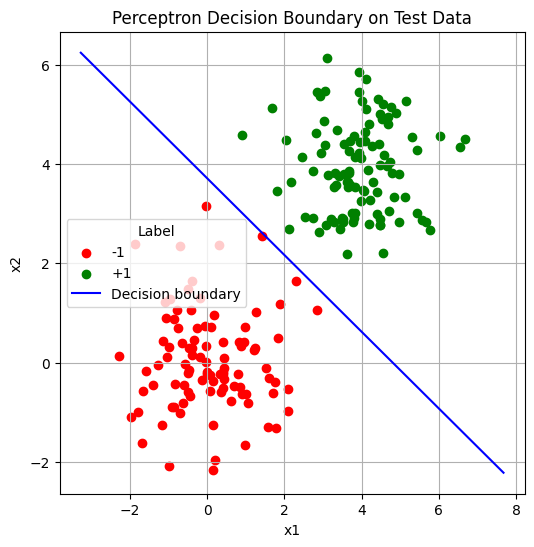

In [44]:
# Answer Q13 here
plt.figure(figsize=(6, 6))

# Test points: -1 in red, +1 in green
neg_test = X_test[y_test == -1]
pos_test = X_test[y_test == 1]

plt.scatter(neg_test["x1"], neg_test["x2"], color="red", label="-1")
plt.scatter(pos_test["x1"], pos_test["x2"], color="green", label="+1")

# Decision boundary: w1*x1 + w2*x2 + b = 0  ->  x2 = -(w1/w2)*x1 - b/w2
w1, w2 = weights
x_vals = np.linspace(X_test["x1"].min() - 1, X_test["x1"].max() + 1, 100)
y_vals = -(w1 / w2) * x_vals - (bias / w2)

plt.plot(x_vals, y_vals, 'b-', label="Decision boundary")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Decision Boundary on Test Data")
plt.legend(title="Label")
plt.grid(True)
plt.show()

## Q14 (1 point). Feedback

Please share what you enjoyed and didn't enjoy about this assignment and how long it took for you to do it.

I enjoyed seeing how the Perceptron algorithm works end to end, especially generating a synthetic linearly separable dataset and then visualizing the learned decision boundary*Answer Q14 here*

## Submitting your work

### Congrats on finishing PA6!

*   Save this notebook (`File > Save`).
*   Download it to your computer as `.ipynb` (`File > Download > Download .ipynb`).
*   Submit the .ipynb file on Canvas.

Tips:
*   After finishing the work, click on the arrow to the right of "Run all" and then click on "Clear all outputs" and "Restart session." Then run each cell in order to make sure everything compiles.
*   Remember to delete the cells you created for testing and any Gemini-affected cells if you used help from Gemini.